In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
x_train = pd.read_csv('x_train_zero_variance_removed.csv')

In [13]:
x_train.head()

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Reports 1 day ago,Reports 2 days ago,Reports 3 days ago,...,Openings 4 days ago,Openings 5 days ago,Openings 6 days ago,Openings 7 days ago,Openings 14 days ago,Openings 30 days ago,Openings 365 days ago,Last 7 days openings,Last 14 days openings,Last 28 days openings
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.013699,0.000000,0.027397,...,0.000000,0.000000,0.0,0.0,0.009756,0.000000,0.0,0.000000,0.007663,0.009901
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.123288,0.082192,0.041096,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.008658,0.011494,0.009901
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.027397,0.041096,0.027397,...,0.000000,0.009756,0.0,0.0,0.000000,0.000000,0.0,0.012987,0.026820,0.023102
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.013699,0.041096,0.027397,...,0.014634,0.000000,0.0,0.0,0.000000,0.004878,0.0,0.012987,0.015326,0.019802


In [14]:
#Use Pearson Correlation to identify correlation between features in training dataset
def heat_map(data):
    plt.figure(figsize = (24, 20))
    cor = data.corr()
    sns.heatmap(cor, annot = False)
    plt.show()

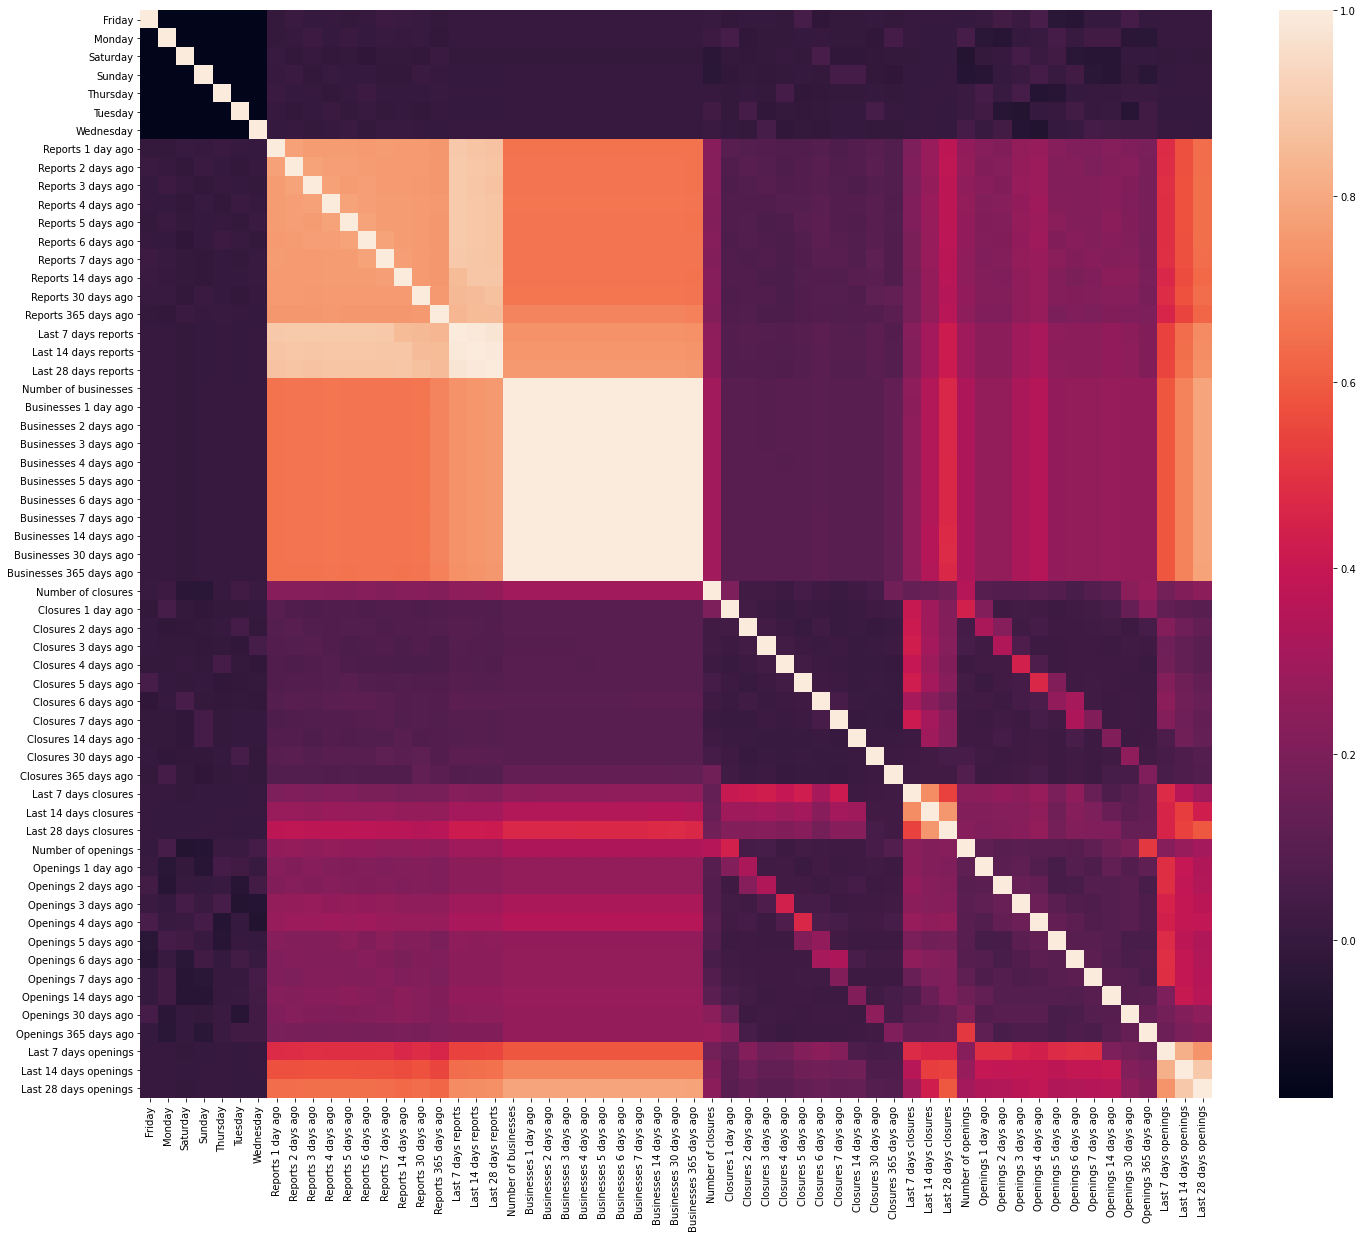

In [15]:
heat_map(x_train)

In [16]:
# iterate through every feature and determnine its correlation with each other feature
#if the correlation exceeds a set threshold, add the feature to a set of highly correlated features
cor_threshold = 0.80
cor_features = set()
cor = x_train.corr()
for i in range (len(cor.columns)):
    for j in range(i):
        if cor.iloc[i, j] > cor_threshold:
            feature = cor.columns[i]
            cor_features.add(feature)

In [17]:
print(len(cor_features),"features found which are highly correlated with one another")
print(cor_features)

15 features found which are highly correlated with one another
{'Last 14 days openings', 'Businesses 365 days ago', 'Businesses 14 days ago', 'Businesses 4 days ago', 'Businesses 30 days ago', 'Last 28 days openings', 'Businesses 2 days ago', 'Businesses 3 days ago', 'Last 14 days reports', 'Last 7 days reports', 'Businesses 5 days ago', 'Businesses 6 days ago', 'Businesses 7 days ago', 'Businesses 1 day ago', 'Last 28 days reports'}


In [18]:
x_train = x_train.drop(cor_features, axis=1)

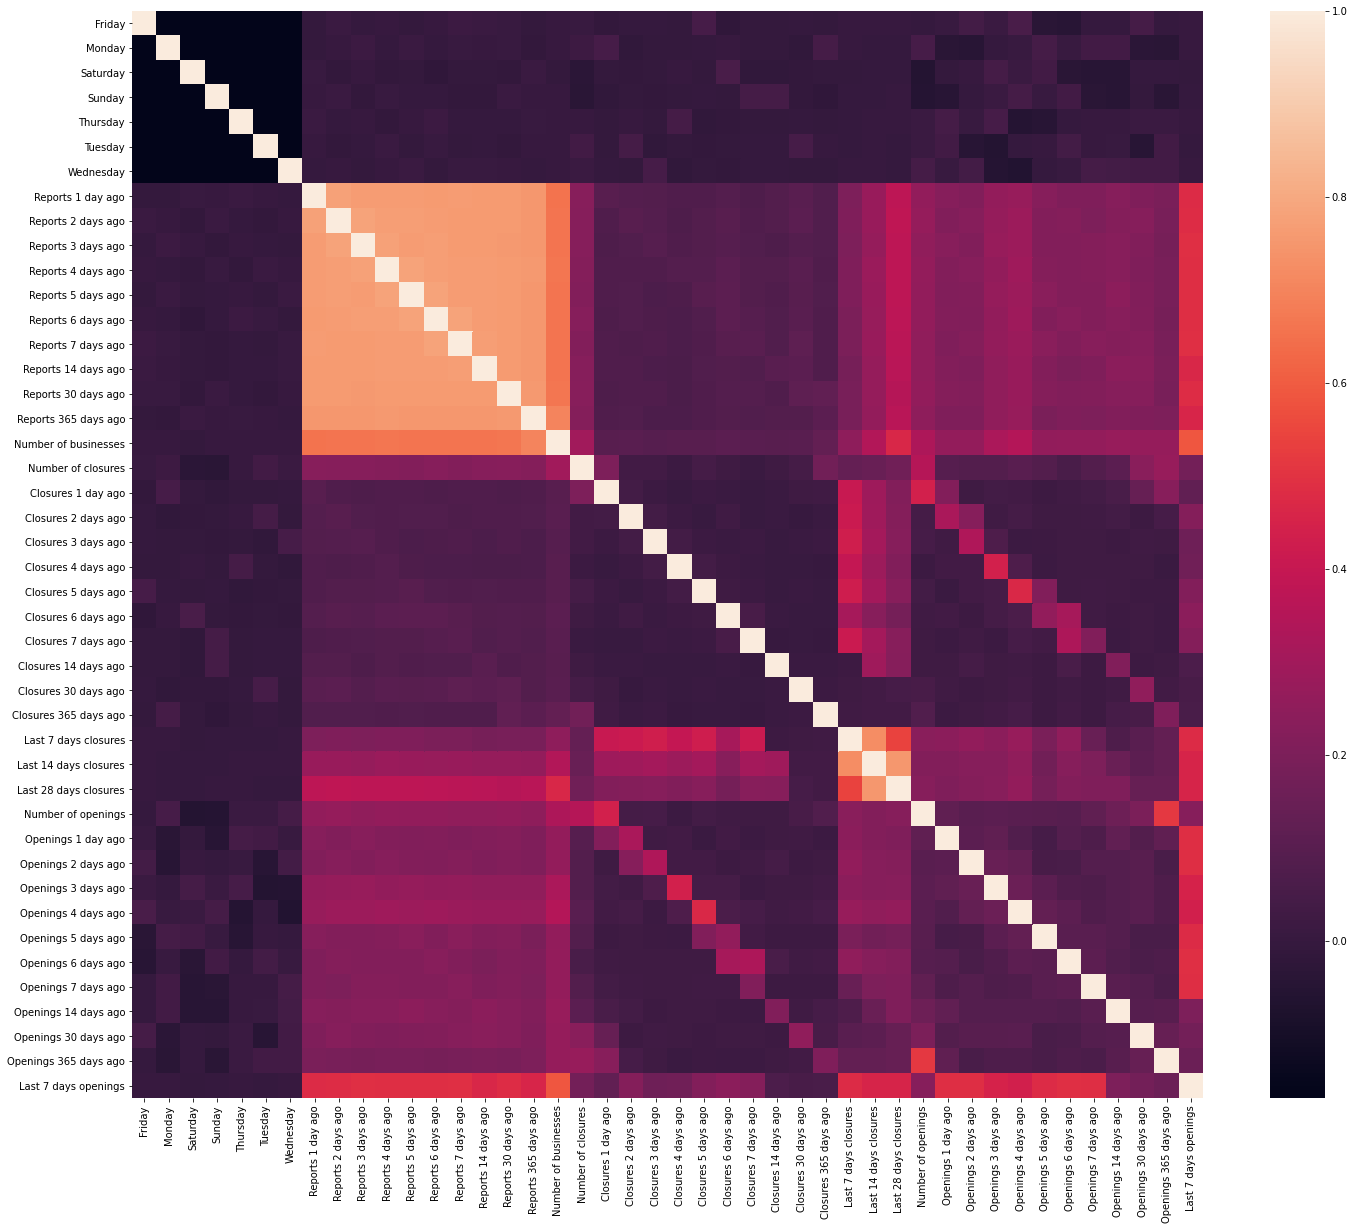

In [19]:
heat_map(x_train)

In [20]:
x_train.to_csv('x_train_high_correlation_removed.csv', index = False)